In [1]:
# Package Loaded
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from sklearn.utils import shuffle
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
n_feature = 2
n_class = 3
n_data_per_class = 100
n_data = n_data_per_class * n_class

In [3]:
X1 = np.random.randn(n_data_per_class, n_feature) + np.array([0, 10])
X2 = np.random.randn(n_data_per_class, n_feature) + np.array([5, 5])
X3 = np.random.randn(n_data_per_class, n_feature) + np.array([10, 0])

Y1 = np.array([[1, 0, 0] for i in range(n_data_per_class)])
Y2 = np.array([[0, 1, 0] for i in range(n_data_per_class)])
Y3 = np.array([[0, 0, 1] for i in range(n_data_per_class)])

X = np.concatenate((X1, X2, X3), axis = 0)
Y = np.concatenate((Y1, Y2, Y3), axis = 0)

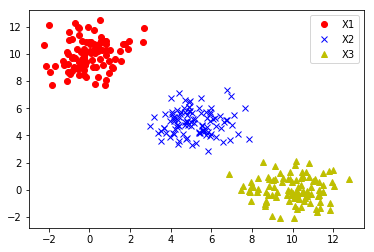

In [4]:
plt.plot(X1[:,0], X1[:,1], 'ro')
plt.plot(X2[:,0], X2[:,1], 'bx')
plt.plot(X3[:,0], X3[:,1], 'y^')
plt.legend(['X1', 'X2', 'X3'], loc=1)
plt.show()

In [5]:
model = Sequential()
model.add(Dense(input_dim=n_feature, units=n_class))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.1))
minibatch_size = 50
history=model.fit(X, Y, epochs=20, batch_size=minibatch_size)

Epoch 1/20
300/300 [==============================] - 0s 437us/step - loss: 1.9001
Epoch 2/20
300/300 [==============================] - 0s 33us/step - loss: 0.1611
Epoch 3/20
300/300 [==============================] - 0s 33us/step - loss: 0.1191
Epoch 4/20
300/300 [==============================] - 0s 38us/step - loss: 0.0976
Epoch 5/20
300/300 [==============================] - 0s 43us/step - loss: 0.0821
Epoch 6/20
300/300 [==============================] - 0s 42us/step - loss: 0.0720
Epoch 7/20
300/300 [==============================] - 0s 35us/step - loss: 0.0636
Epoch 8/20
300/300 [==============================] - 0s 35us/step - loss: 0.0572
Epoch 9/20
300/300 [==============================] - 0s 36us/step - loss: 0.0533
Epoch 10/20
300/300 [==============================] - 0s 41us/step - loss: 0.0489
Epoch 11/20
300/300 [==============================] - 0s 32us/step - loss: 0.0447
Epoch 12/20
300/300 [==============================] - 0s 33us/step - loss: 0.0421
Epoch 13/20


In [6]:
X_, Y_ = shuffle(X, Y)
classes = model.predict_classes(X_[0:10], batch_size=minibatch_size)
prob = model.predict_proba(X_[0:10], batch_size=minibatch_size)

print('classified : ')
print(np.argmax(model.predict(X_[0:10]), axis = 1) == classes)
print('\n-------------------------------------------------------\n')
print('probability : ')
print(prob)

classified : 
[ True  True  True  True  True  True  True  True  True  True]

-------------------------------------------------------

probability : 
[[2.50940789e-02 9.67253864e-01 7.65207084e-03]
 [2.44779997e-02 9.63816762e-01 1.17053045e-02]
 [3.99652906e-02 9.56421971e-01 3.61271854e-03]
 [1.06767041e-03 9.30553854e-01 6.83784932e-02]
 [9.97490644e-01 2.50932830e-03 8.13302967e-11]
 [3.39437922e-09 5.58856502e-03 9.94411409e-01]
 [1.06324134e-02 9.83124733e-01 6.24290807e-03]
 [1.36825055e-01 8.61424327e-01 1.75059540e-03]
 [9.92559671e-01 7.44033977e-03 9.44146983e-09]
 [9.19292629e-01 8.07072073e-02 7.61266250e-08]]
